In [110]:
import argparse
import os

import cv2 as cv
import pandas as pd
import torch
import torchvision.transforms as transforms
from PIL import Image
from tqdm import tqdm
from model import Autoencoder_Unet
from rasterio.plot import reshape_as_raster, reshape_as_image
import matplotlib.pyplot as plt
import numpy as np

In [142]:
model = Autoencoder_Unet(encoder_name='resnet50')
checkpoint = torch.load('../../../../models/autoencoder_winter_imagenet_pretrained_no_es.pth', map_location='cpu')
model.load_state_dict(checkpoint['model_state_dict'])

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [143]:
test_df = pd.read_csv('../../../../test_data/winter2016_divided/test.csv')

image_info = test_df.iloc[1]

datasets_path = '../../../../test_data/winter2016_divided/'

img_path = os.path.join(datasets_path, image_info["dataset_folder"], "images",
                        image_info["name"] + '_' + image_info["channel"] + '_' + image_info["position"] + '.' +
                        image_info["image_type"])
img = Image.open(img_path)

img_tensor = transforms.ToTensor()(img)

prediction = model(img_tensor.view(1, 3, image_info["image_size"], image_info["image_size"]))


In [144]:
prediction = prediction[0].detach().numpy()

In [145]:
prediction = reshape_as_image(prediction)

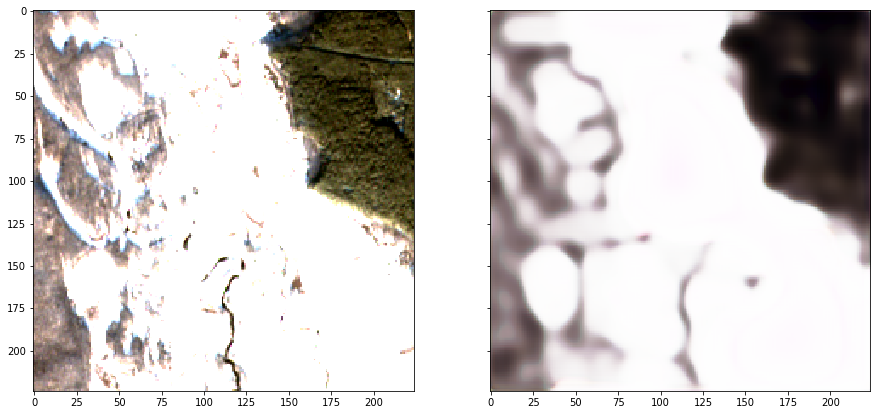

In [146]:
f, ax = plt.subplots(1, 2, sharey=True, figsize=(15,15))
ax[1].imshow(prediction)
ax[0].imshow(img)